<a href="https://colab.research.google.com/github/nalrob/Aprendizaje-Automatico/blob/main/CTRCD_Modelos_lastversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scikit-learn==0.24.2  # versión compatible con eli5
!pip install eli5==0.11.0  # última versión conocida estable


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 3.1 MB/s eta 0:00:00


In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_auc_score, recall_score,
                             f1_score, precision_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils.metaestimators import available_if

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt



In [3]:
from google.colab import files
uploaded= files.upload()

Saving cardiotox.zip to cardiotox.zip


In [4]:
import zipfile
import io
data=zipfile.ZipFile(io.BytesIO(uploaded['cardiotox.zip']),'r')
data.extractall()

In [5]:
### SOLO historial clinico

import pandas as pd

def import_data(from_file):
    results = []
    titles = []

    try:
        with open(from_file, 'r') as archivo:
            lineas = archivo.readlines()

            # Process the first line to extract titles
            titles = lineas[0].strip().split(';')

            # Process the missing lines
            for linea in lineas[1:]:
                values = linea.strip().split(';')
                result_iteration = process_values(values)
                results.append(result_iteration)

    except FileNotFoundError:
        print(f"Error: El archivo {from_file} no fue encontrado.")
        return None
    except Exception as e:
        print(f"Error al leer el archivo: {str(e)}")
        return None

    # Create a dataframe w results & add titles
    df_var = pd.DataFrame(results, columns=titles[:27])
    return df_var

def process_values(values):
    # Devolver los valores de las 27 primeras columnas
    return values[:27]

file = '/content/BC_cardiotox_clinical_and_functional_variables.csv'
df = import_data(file)
df

,heart_rate,age,weight,height,CTRCD,time,heart_rhythm,LVEF,PWT,LAd,...,smoker,exsmoker,ACprev,antiHER2prev,RTprev,CIprev,ICMprev,ARRprev,VALVprev,cxvalv
0,103,58,58,151,1,619,0,"60,24096386","0,8","3,8",...,,,,,,,,,,
1,94,75,66,150,0,1884,0,"66,27403031","1,093170204","3,463273568",...,0,0,0,0,0,0,0,0,0,0
2,96,53,55,149,0,1830,0,70,"0,661084178","2,894431584",...,,,,,,,,,,
3,58,67,50,"162,5",1,820,0,"56,54077998","0,798487967","3,439739698",...,,,,,,,,,,
4,76,59,70,159,0,2276,0,"67,21281916","0,73427974","2,698600354",...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,69,40,58,"158,5",0,392,0,"67,34021706","0,849898211","2,604906554",...,0,0,0,0,0,0,0,0,0,0
527,77,42,102,163,0,538,0,"73,55165001","1,020905154","2,263032997",...,0,0,0,0,0,0,0,0,0,0
528,80,45,63,171,0,2027,0,"74,78422784","0,808679193","3,376373508",...,0,0,0,0,0,0,0,0,0,0
529,91,53,69,150,0,679,0,"60,81284513","1,078942241","2,571179447",...,,,,,,,,,,


In [6]:
df = df.apply(pd.to_numeric, errors='coerce')

In [8]:
df.fillna(0, inplace=True)

In [9]:
data = df[df['AC'] == 1]

In [10]:
data.columns

Index(['heart_rate', 'age', 'weight', 'height', 'CTRCD', 'time',
       'heart_rhythm', 'LVEF', 'PWT', 'LAd', 'LVDd', 'LVSd', 'AC', 'antiHER2',
       'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev',
       'RTprev', 'CIprev', 'ICMprev', 'ARRprev', 'VALVprev', 'cxvalv'],
      dtype='object')

In [11]:
#data = data.drop(columns=['AC','LVDd','CIprev','cxvalv','heart_rhythm','ICMprev','ARRprev','VALVprev'])
data = data.drop(columns=['AC','LVDd','CIprev','cxvalv','heart_rhythm','ICMprev','ARRprev','VALVprev','antiHER2prev'])
data

,heart_rate,age,weight,height,CTRCD,time,LVEF,PWT,LAd,LVSd,antiHER2,HTA,DL,DM,smoker,exsmoker,ACprev,RTprev
6,74,65,54.0,164.0,1,252,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,69,48,55.0,170.0,0,1836,58.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10,81,54,73.0,160.0,0,2483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
13,85,56,64.0,158.0,0,1627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,66,43,80.0,155.0,0,363,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,97,40,62.0,0.0,0,591,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524,82,37,62.0,161.0,0,198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
525,63,57,60.0,166.0,0,966,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
526,69,40,58.0,0.0,0,392,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
data['CTRCD'].value_counts()


,count
CTRCD,
0,292
1,37


In [12]:
#feature_names = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd', 'antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev']
feature_names = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd', 'antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']


X=data[feature_names]
y=data['CTRCD']


**1. Random Forest**

In [54]:
# Definir las columnas para el escalado y la codificación one-hot
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo Random Forest
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100,  max_depth=5, random_state=42))])

# Número de grupos para la validación cruzada
n_groups = 10

# Inicializar métricas y almacenamiento
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
group_results = []
all_y_test = []
all_y_pred_proba = []

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Dividir los conjuntos de entrenamiento y prueba
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Balancear clases en el conjunto de entrenamiento
    sample_size = 25
    X_train_class_0_sampled = X_train_fold.loc[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold.loc[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]
    y_pred = model.predict(X_test_fold)

    # Guardar predicciones y valores reales
    all_y_test.extend(y_test_fold)
    all_y_pred_proba.extend(y_pred_proba)

    # Calcular métricas para este grupo
    accuracy = accuracy_score(y_test_fold, y_pred)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Resultados promedios
print("\nResultados para RANDOM FOREST:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")



Resultados para RANDOM FOREST:
Promedio Accuracy: 0.62
Promedio ROC AUC: 0.73
Promedio Recall: 0.78
Promedio F1 Score: 0.32
Promedio Precision: 0.20

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.61, ROC AUC: 0.75, Recall: 1.00, F1 Score: 0.38, Precision: 0.24
Grupo 2 - Accuracy: 0.55, ROC AUC: 0.61, Recall: 0.50, F1 Score: 0.21, Precision: 0.13
Grupo 3 - Accuracy: 0.70, ROC AUC: 0.78, Recall: 0.75, F1 Score: 0.38, Precision: 0.25
Grupo 4 - Accuracy: 0.39, ROC AUC: 0.78, Recall: 1.00, F1 Score: 0.29, Precision: 0.17
Grupo 5 - Accuracy: 0.73, ROC AUC: 0.83, Recall: 0.75, F1 Score: 0.40, Precision: 0.27
Grupo 6 - Accuracy: 0.70, ROC AUC: 0.62, Recall: 0.50, F1 Score: 0.29, Precision: 0.20
Grupo 7 - Accuracy: 0.55, ROC AUC: 0.44, Recall: 0.25, F1 Score: 0.12, Precision: 0.08
Grupo 8 - Accuracy: 0.73, ROC AUC: 0.82, Recall: 1.00, F1 Score: 0.40, Precision: 0.25
Grupo 9 - Accuracy: 0.52, ROC AUC: 0.87, Recall: 1.00, F1 Score: 0.27, Precision: 0.16
Grupo 10 - Accuracy: 0.75, ROC AUC: 0.80

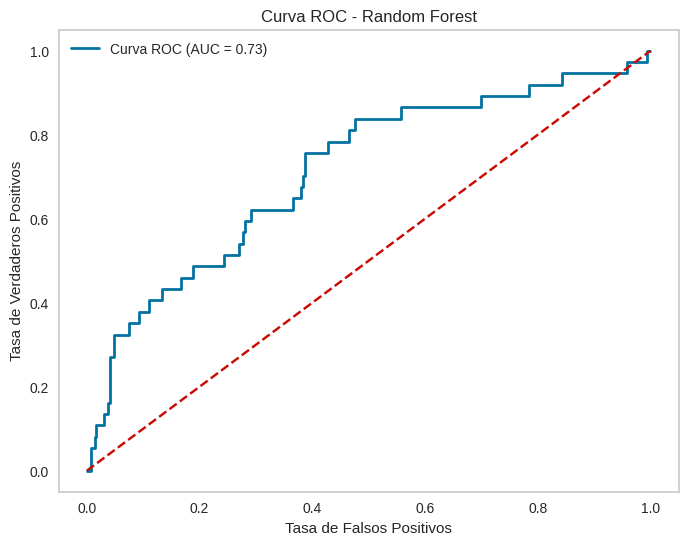

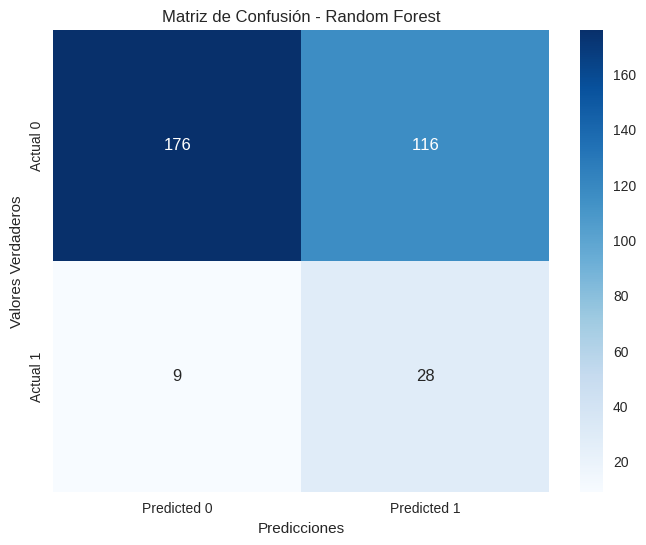

In [14]:
# Curva ROC total
fpr, tpr, _ = roc_curve(all_y_test, all_y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Curva ROC (AUC = {np.mean(metrics["roc_auc"]):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curva ROC - Random Forest')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.grid()
plt.show()

# Matriz de confusión
final_y_pred = [1 if p >= 0.5 else 0 for p in all_y_pred_proba]
final_cm_test = confusion_matrix(all_y_test, final_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

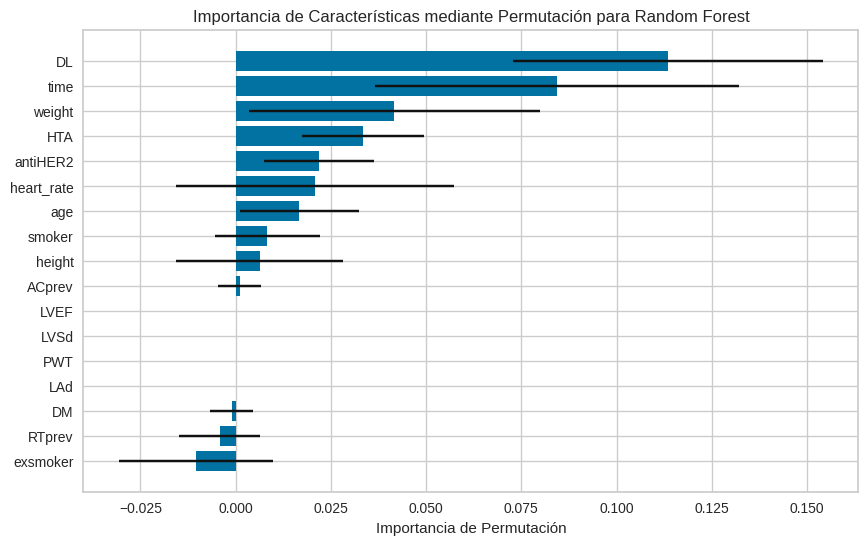

In [15]:
perm_importance = permutation_importance(model, X_test_fold, y_test_fold, n_repeats=30, random_state=42)

# Ordena las importancias para visualizarlas
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test_fold.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para Random Forest")
plt.show()

In [93]:
#CON UMBRAL MEJORADO
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo Random Forest
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(
                            n_estimators=100,
                            max_depth=5,
                            random_state=42))])

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

all_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(all_fpr)

all_y_test = []
all_y_pred = []

# Umbral de clasificación ajustado
threshold = 0.7  # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestrear las clases con 25 muestras por clase
    sample_size = 25
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Promediar TPR y calcular la curva ROC
mean_tpr /= n_groups  # Promedio de TPR para cada grupo

# Mostrar los resultados de métricas
print("\nResultados para Random Forest:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")



Resultados para Random Forest:
Promedio Accuracy: 0.86
Promedio ROC AUC: 0.73
Promedio Recall: 0.34
Promedio F1 Score: 0.35
Promedio Precision: 0.40

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.82, ROC AUC: 0.75, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 2 - Accuracy: 0.91, ROC AUC: 0.61, Recall: 0.50, F1 Score: 0.57, Precision: 0.67
Grupo 3 - Accuracy: 0.94, ROC AUC: 0.78, Recall: 0.50, F1 Score: 0.67, Precision: 1.00
Grupo 4 - Accuracy: 0.85, ROC AUC: 0.78, Recall: 0.75, F1 Score: 0.55, Precision: 0.43
Grupo 5 - Accuracy: 0.97, ROC AUC: 0.83, Recall: 0.75, F1 Score: 0.86, Precision: 1.00
Grupo 6 - Accuracy: 0.76, ROC AUC: 0.62, Recall: 0.25, F1 Score: 0.20, Precision: 0.17
Grupo 7 - Accuracy: 0.76, ROC AUC: 0.44, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 8 - Accuracy: 0.91, ROC AUC: 0.82, Recall: 0.33, F1 Score: 0.40, Precision: 0.50
Grupo 9 - Accuracy: 0.82, ROC AUC: 0.87, Recall: 0.33, F1 Score: 0.25, Precision: 0.20
Grupo 10 - Accuracy: 0.88, ROC AUC: 0.80

**2. Naive Bayes**

In [94]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo Naive Bayes (GaussianNB)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GaussianNB(var_smoothing=1e-1))])

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

all_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(all_fpr)

all_y_test = []
all_y_pred = []

# Umbral de clasificación ajustado
threshold = 0.7  # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestrear las clases con 25 muestras por clase
    sample_size = 25
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Promediar TPR y calcular la curva ROC
mean_tpr /= n_groups  # Promedio de TPR para cada grupo

# Mostrar los resultados de métricas
print("\nResultados para Naive Bayes (GaussianNB):")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")



Resultados para Naive Bayes (GaussianNB):
Promedio Accuracy: 0.80
Promedio ROC AUC: 0.66
Promedio Recall: 0.34
Promedio F1 Score: 0.31
Promedio Precision: 0.36

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.94, ROC AUC: 0.78, Recall: 0.50, F1 Score: 0.67, Precision: 1.00
Grupo 2 - Accuracy: 0.82, ROC AUC: 0.64, Recall: 0.50, F1 Score: 0.40, Precision: 0.33
Grupo 3 - Accuracy: 0.79, ROC AUC: 0.66, Recall: 0.25, F1 Score: 0.22, Precision: 0.20
Grupo 4 - Accuracy: 0.58, ROC AUC: 0.69, Recall: 0.75, F1 Score: 0.30, Precision: 0.19
Grupo 5 - Accuracy: 0.88, ROC AUC: 0.77, Recall: 0.50, F1 Score: 0.50, Precision: 0.50
Grupo 6 - Accuracy: 0.79, ROC AUC: 0.63, Recall: 0.25, F1 Score: 0.22, Precision: 0.20
Grupo 7 - Accuracy: 0.64, ROC AUC: 0.47, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 8 - Accuracy: 0.82, ROC AUC: 0.58, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 9 - Accuracy: 0.82, ROC AUC: 0.68, Recall: 0.33, F1 Score: 0.25, Precision: 0.20
Grupo 10 - Accuracy: 0.94, RO

In [44]:
# Definir las columnas para el escalado y la codificación one-hot
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GaussianNB(var_smoothing=1e+3))])

# Número de grupos para la validación cruzada
n_groups = 10

# Inicializar métricas y almacenamiento
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
group_results = []
all_y_test = []
all_y_pred_proba = []

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Dividir los conjuntos de entrenamiento y prueba
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Balancear clases en el conjunto de entrenamiento
    sample_size = 25
    X_train_class_0_sampled = X_train_fold.loc[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold.loc[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]
    y_pred = model.predict(X_test_fold)

    # Guardar predicciones y valores reales
    all_y_test.extend(y_test_fold)
    all_y_pred_proba.extend(y_pred_proba)

    # Calcular métricas para este grupo
    accuracy = accuracy_score(y_test_fold, y_pred)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Resultados promedios
print("\nResultados para naive bayes:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")



Resultados para naive bayes:
Promedio Accuracy: 0.72
Promedio ROC AUC: 0.67
Promedio Recall: 0.34
Promedio F1 Score: 0.19
Promedio Precision: 0.20

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.79, ROC AUC: 0.63, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 2 - Accuracy: 0.39, ROC AUC: 0.53, Recall: 0.50, F1 Score: 0.17, Precision: 0.10
Grupo 3 - Accuracy: 0.82, ROC AUC: 0.80, Recall: 0.25, F1 Score: 0.25, Precision: 0.25
Grupo 4 - Accuracy: 0.64, ROC AUC: 0.78, Recall: 0.75, F1 Score: 0.33, Precision: 0.21
Grupo 5 - Accuracy: 0.91, ROC AUC: 0.86, Recall: 0.25, F1 Score: 0.40, Precision: 1.00
Grupo 6 - Accuracy: 0.67, ROC AUC: 0.67, Recall: 0.50, F1 Score: 0.27, Precision: 0.18
Grupo 7 - Accuracy: 0.48, ROC AUC: 0.44, Recall: 0.50, F1 Score: 0.19, Precision: 0.12
Grupo 8 - Accuracy: 0.67, ROC AUC: 0.64, Recall: 0.67, F1 Score: 0.27, Precision: 0.17
Grupo 9 - Accuracy: 0.91, ROC AUC: 0.66, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 10 - Accuracy: 0.91, ROC AUC: 0.71, 

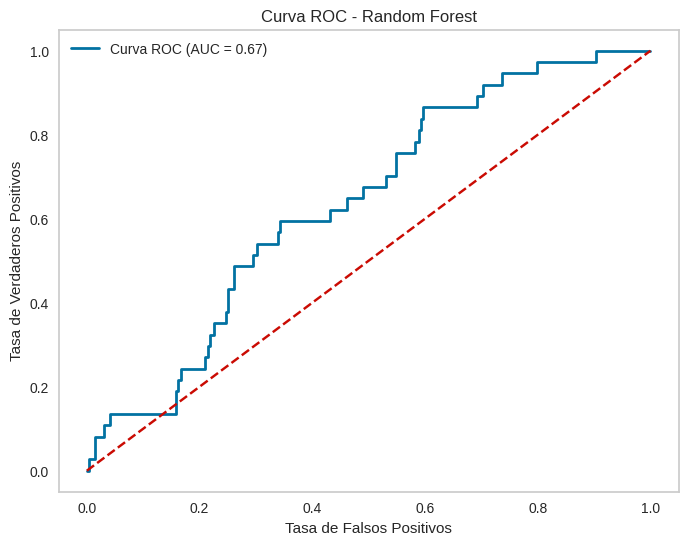

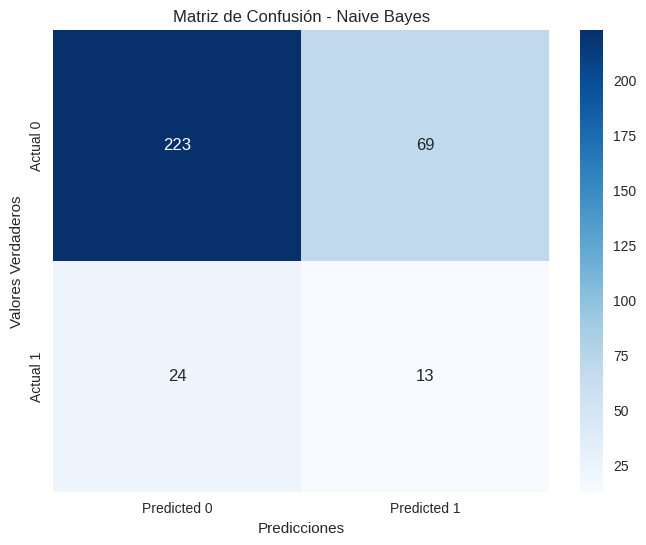

In [46]:
# Curva ROC total
fpr, tpr, _ = roc_curve(all_y_test, all_y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Curva ROC (AUC = {np.mean(metrics["roc_auc"]):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curva ROC - Random Forest')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.grid()
plt.show()

# Matriz de confusión
final_y_pred = [1 if p >= 0.5 else 0 for p in all_y_pred_proba]
final_cm_test = confusion_matrix(all_y_test, final_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Naive Bayes')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

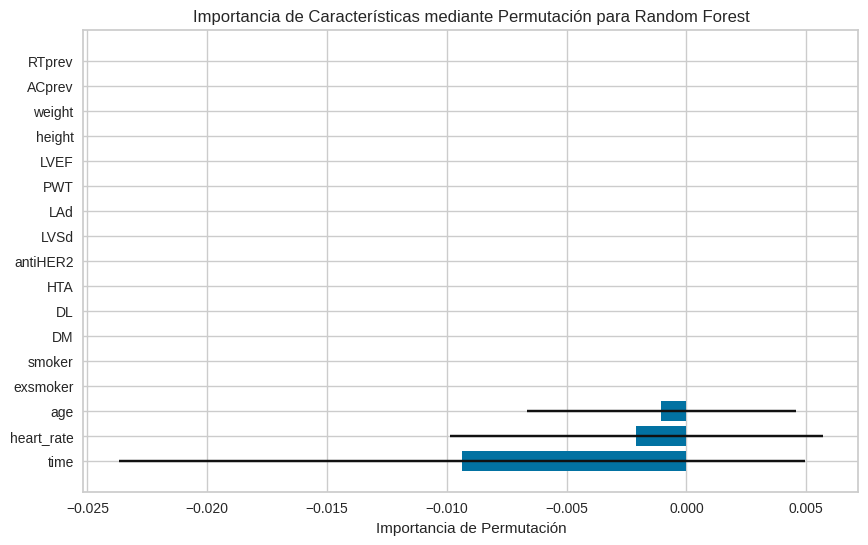

In [47]:
perm_importance = permutation_importance(model, X_test_fold, y_test_fold, n_repeats=30, random_state=42)

# Ordena las importancias para visualizarlas
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test_fold.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para Random Forest")
plt.show()

**3. KNN**

In [95]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo K-Nearest Neighbors (KNN)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier(n_neighbors=5))])  # Puedes ajustar el número de vecinos

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

all_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(all_fpr)

all_y_test = []
all_y_pred = []

# Umbral de clasificación ajustado
threshold = 0.7 # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestrear las clases con 25 muestras por clase
    sample_size = 25
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Promediar TPR y calcular la curva ROC
mean_tpr /= n_groups  # Promedio de TPR para cada grupo

# Mostrar los resultados de métricas
print("\nResultados para K-Nearest Neighbors (KNN):")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")



Resultados para K-Nearest Neighbors (KNN):
Promedio Accuracy: 0.79
Promedio ROC AUC: 0.64
Promedio Recall: 0.23
Promedio F1 Score: 0.22
Promedio Precision: 0.22

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.73, ROC AUC: 0.53, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 2 - Accuracy: 0.76, ROC AUC: 0.58, Recall: 0.25, F1 Score: 0.20, Precision: 0.17
Grupo 3 - Accuracy: 0.76, ROC AUC: 0.37, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 4 - Accuracy: 0.91, ROC AUC: 0.78, Recall: 0.50, F1 Score: 0.57, Precision: 0.67
Grupo 5 - Accuracy: 0.97, ROC AUC: 0.90, Recall: 0.75, F1 Score: 0.86, Precision: 1.00
Grupo 6 - Accuracy: 0.76, ROC AUC: 0.69, Recall: 0.25, F1 Score: 0.20, Precision: 0.17
Grupo 7 - Accuracy: 0.67, ROC AUC: 0.66, Recall: 0.25, F1 Score: 0.15, Precision: 0.11
Grupo 8 - Accuracy: 0.82, ROC AUC: 0.78, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 9 - Accuracy: 0.73, ROC AUC: 0.68, Recall: 0.33, F1 Score: 0.18, Precision: 0.12
Grupo 10 - Accuracy: 0.84, R

In [46]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo K-Nearest Neighbors
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Contar las muestras por clase en el conjunto de entrenamiento
    class_counts = y_train_fold.value_counts()
    class_0_count = class_counts.get(0, 0)
    class_1_count = class_counts.get(1, 0)

    # Determinar el tamaño de la muestra para cada clase
    sample_size = 25

    # Muestrear las clases con el tamaño determinado
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Calcular métricas
    y_pred = model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular y mostrar el promedio de métricas
print("\nResultados para K-Nearest Neighbors:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")



Resultados para K-Nearest Neighbors:
Promedio Accuracy: 0.65
Promedio ROC AUC: 0.64
Promedio Recall: 0.62
Promedio F1 Score: 0.29
Promedio Precision: 0.19


**4. Logistic Regression**

In [96]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo Regresión Logística
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(
                            random_state=42,
                            max_iter=1000,
                            solver='liblinear'))])  # Puedes ajustar el solver si es necesario

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

all_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(all_fpr)

all_y_test = []
all_y_pred = []

# Umbral de clasificación ajustado
threshold = 0.7  # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestrear las clases con 25 muestras por clase
    sample_size = 25
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Promediar TPR y calcular la curva ROC
mean_tpr /= n_groups  # Promedio de TPR para cada grupo

# Mostrar los resultados de métricas
print("\nResultados para Regresión Logística:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")



Resultados para Regresión Logística:
Promedio Accuracy: 0.79
Promedio ROC AUC: 0.69
Promedio Recall: 0.38
Promedio F1 Score: 0.29
Promedio Precision: 0.32

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.82, ROC AUC: 0.57, Recall: 0.25, F1 Score: 0.25, Precision: 0.25
Grupo 2 - Accuracy: 0.91, ROC AUC: 0.78, Recall: 0.25, F1 Score: 0.40, Precision: 1.00
Grupo 3 - Accuracy: 0.79, ROC AUC: 0.71, Recall: 0.75, F1 Score: 0.46, Precision: 0.33
Grupo 4 - Accuracy: 0.73, ROC AUC: 0.87, Recall: 0.75, F1 Score: 0.40, Precision: 0.27
Grupo 5 - Accuracy: 0.91, ROC AUC: 0.75, Recall: 0.50, F1 Score: 0.57, Precision: 0.67
Grupo 6 - Accuracy: 0.70, ROC AUC: 0.70, Recall: 0.25, F1 Score: 0.17, Precision: 0.12
Grupo 7 - Accuracy: 0.67, ROC AUC: 0.47, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 8 - Accuracy: 0.79, ROC AUC: 0.60, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 9 - Accuracy: 0.76, ROC AUC: 0.69, Recall: 0.67, F1 Score: 0.33, Precision: 0.22
Grupo 10 - Accuracy: 0.88, ROC AUC

In [49]:
#ULTIMO CODIGO
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo de Regresión Logística
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

# Número de grupos para la validación cruzada
n_groups = 15

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Contar las muestras por clase en el conjunto de entrenamiento
    class_counts = y_train_fold.value_counts()
    class_0_count = class_counts.get(0, 0)
    class_1_count = class_counts.get(1, 0)

    # Determinar el tamaño de la muestra para cada clase
    sample_size = 25

    # Muestrear las clases con el tamaño determinado
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Contar las muestras por clase después del balanceo
    balanced_class_counts = y_train_balanced.value_counts()
    balanced_class_0_count = balanced_class_counts.get(0, 0)
    balanced_class_1_count = balanced_class_counts.get(1, 0)

    # Imprimir las cantidades de cada clase antes y después del balanceo
   # print(f"Grupo {group_index + 1}:")
   # print(f"- Clase 0: {balanced_class_0_count}, Clase 1: {balanced_class_1_count}")

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)
    mean_tpr = np.interp(np.linspace(0, 1, 100), fpr, tpr)
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular y mostrar el promedio de métricas
print("\nResultados para Regresión Logística:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")



Resultados para Regresión Logística:
Promedio Accuracy: 0.60
Promedio ROC AUC: 0.62
Promedio Recall: 0.56
Promedio F1 Score: 0.24
Promedio Precision: 0.16


**5. Maquinas de soporte (SVC)**

In [66]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo SVC
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(probability=True, random_state=42))])

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Contar las muestras por clase en el conjunto de entrenamiento
    class_counts = y_train_fold.value_counts()
    class_0_count = class_counts.get(0, 0)
    class_1_count = class_counts.get(1, 0)

    # Determinar el tamaño de la muestra para cada clase
    sample_size = 25

    # Muestrear las clases con el tamaño determinado
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Contar las muestras por clase después del balanceo
    balanced_class_counts = y_train_balanced.value_counts()
    balanced_class_0_count = balanced_class_counts.get(0, 0)
    balanced_class_1_count = balanced_class_counts.get(1, 0)

    # Imprimir las cantidades de cada clase antes y después del balanceo
 #   print(f"Grupo {group_index + 1}:")
 #   print(f"- Clase 0 en entrenamiento: {balanced_class_0_count}, Clase 1 en entrenamiento: {balanced_class_1_count}")

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)
    mean_tpr = np.interp(np.linspace(0, 1, 100), fpr, tpr)
    mean_tpr[-1] = 1.0  # Asegúrate de que el último punto sea 1.0

    # Calcular métricas
    y_pred = model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, y_pred)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular y mostrar el promedio de métricas
print("\nResultados para SVC:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")



Resultados para SVC:
Promedio Accuracy: 0.62
Promedio ROC AUC: 0.50
Promedio Recall: 0.66
Promedio F1 Score: 0.28
Promedio Precision: 0.18


# 6.GBM

In [70]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo GradientBoosting
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GradientBoostingClassifier(
                            random_state=42,
                            n_estimators=400,
                            learning_rate=0.05,
                            max_depth=1,
                            subsample=0.8,
                            min_samples_split=20,
                            min_samples_leaf=5))])

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

all_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(all_fpr)

all_y_test = []
all_y_pred = []

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestrear las clases con 25 muestras por clase
    sample_size = 25
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Almacenar FPR y TPR para todas las curvas ROC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)
    mean_tpr += np.interp(all_fpr, fpr, tpr)  # Interpolación para alinear las curvas

    # Almacenar las etiquetas verdaderas y las predicciones
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(model.predict(X_test_fold))

    # Calcular métricas
    accuracy = accuracy_score(y_test_fold, model.predict(X_test_fold))
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, model.predict(X_test_fold))
    f1 = f1_score(y_test_fold, model.predict(X_test_fold))
    precision = precision_score(y_test_fold, model.predict(X_test_fold))

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Promediar TPR y calcular la curva ROC
mean_tpr /= n_groups  # Promedio de TPR para cada grup


# Mostrar los resultados de métricas
print("\nResultados para Gradient Boosting:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")


Resultados para Gradient Boosting:
Promedio Accuracy: 0.61
Promedio ROC AUC: 0.72
Promedio Recall: 0.72
Promedio F1 Score: 0.29
Promedio Precision: 0.19


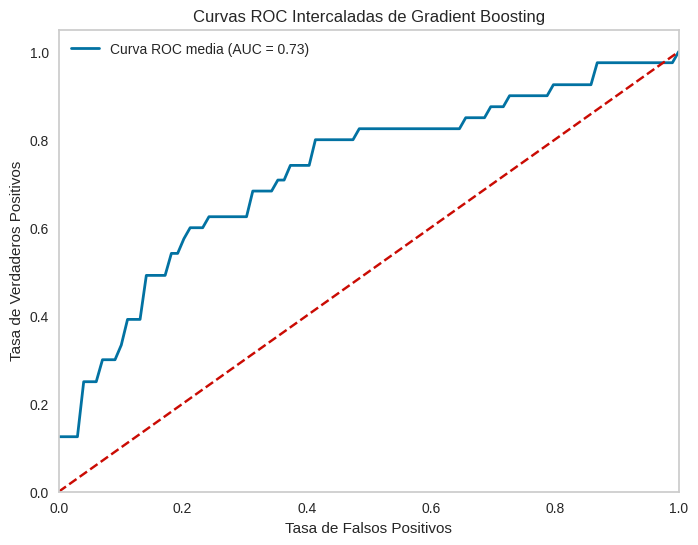

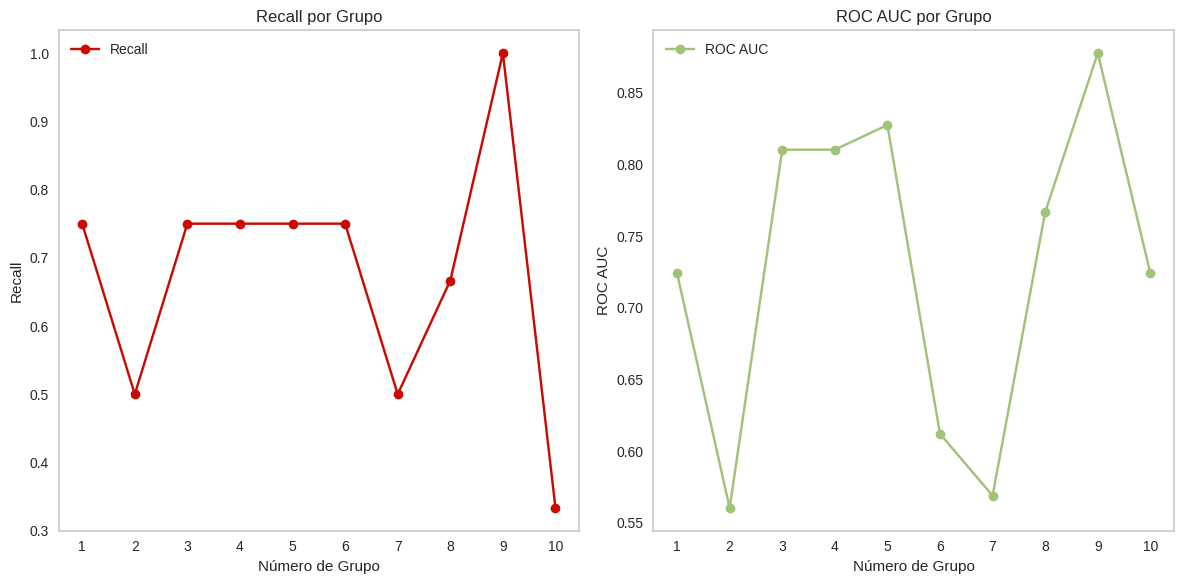


Matriz de confusión para el conjunto de prueba:
[[183 109]
 [ 12  25]]


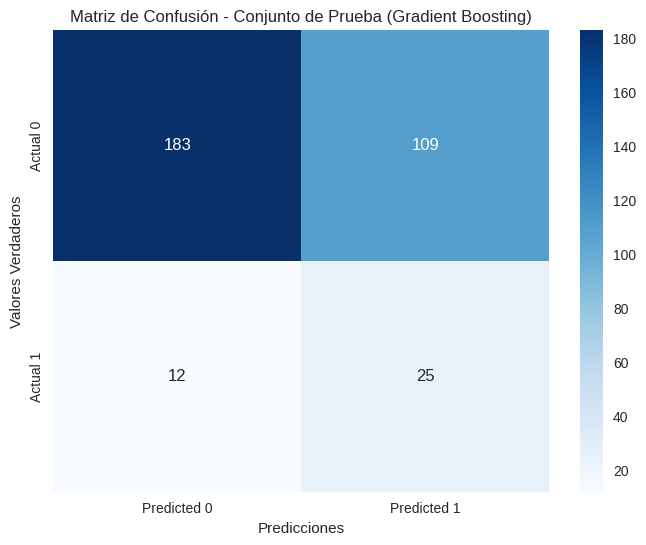

In [51]:
# Graficar la curva ROC total
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='b', lw=2, label='Curva ROC media (AUC = {:.2f})'.format(np.mean(metrics['roc_auc'])))
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curvas ROC Intercaladas de Gradient Boosting')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend()
plt.show()

# Visualización de las métricas
plt.figure(figsize=(12, 6))

# Graficar Recall
plt.subplot(1, 2, 1)
plt.plot(range(1, n_groups + 1), metrics['recall'], marker='o', color='r', label='Recall')
plt.title('Recall por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('Recall')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Graficar AUC
plt.subplot(1, 2, 2)
plt.plot(range(1, n_groups + 1), metrics['roc_auc'], marker='o', color='g', label='ROC AUC')
plt.title('ROC AUC por Grupo')
plt.xlabel('Número de Grupo')
plt.ylabel('ROC AUC')
plt.xticks(range(1, n_groups + 1))
plt.grid()
plt.legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# Calcular la matriz de confusión total para el conjunto de prueba
final_cm_test = confusion_matrix(all_y_test, all_y_pred)

# Mostrar la matriz de confusión para el conjunto de prueba
print("\nMatriz de confusión para el conjunto de prueba:")
print(final_cm_test)

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Conjunto de Prueba (Gradient Boosting)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()


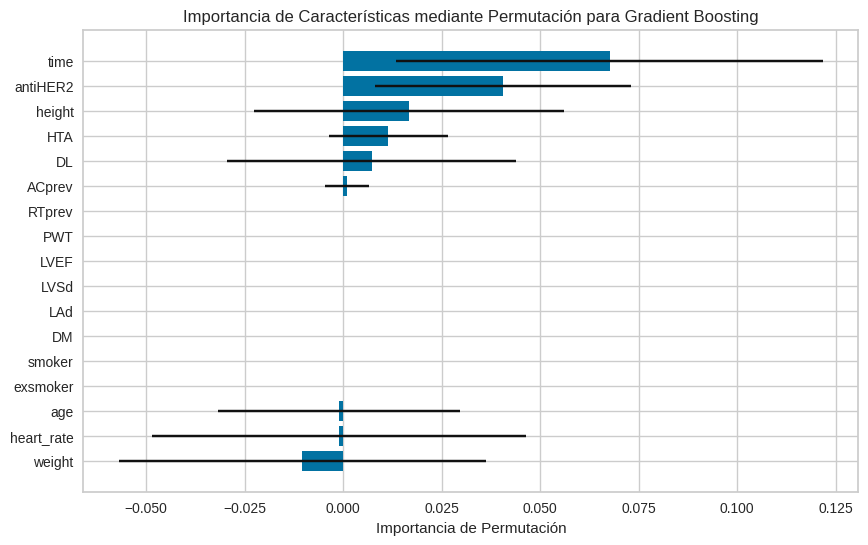

In [53]:
perm_importance = permutation_importance(model, X_test_fold, y_test_fold, n_repeats=30, random_state=42)

# Ordena las importancias para visualizarlas
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test_fold.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para Gradient Boosting")
plt.show()

In [97]:
# CON UMBRAL MEJORADO

scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo Gradient Boosting
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GradientBoostingClassifier(
                            random_state=42,
                            n_estimators=400,
                            learning_rate=0.05,
                            max_depth=1,
                            subsample=0.8,
                            min_samples_split=20,
                            min_samples_leaf=5))])

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

all_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(all_fpr)

all_y_test = []
all_y_pred = []

# Umbral de clasificación ajustado
threshold = 0.7  # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestrear las clases con 25 muestras por clase
    sample_size = 25
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Promediar TPR y calcular la curva ROC
mean_tpr /= n_groups  # Promedio de TPR para cada grupo

# Mostrar los resultados de métricas
print("\nResultados para Gradient Boosting:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")



Resultados para Gradient Boosting:
Promedio Accuracy: 0.77
Promedio ROC AUC: 0.72
Promedio Recall: 0.52
Promedio F1 Score: 0.32
Promedio Precision: 0.26

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.88, ROC AUC: 0.63, Recall: 0.25, F1 Score: 0.33, Precision: 0.50
Grupo 2 - Accuracy: 0.82, ROC AUC: 0.60, Recall: 0.50, F1 Score: 0.40, Precision: 0.33
Grupo 3 - Accuracy: 0.79, ROC AUC: 0.84, Recall: 0.75, F1 Score: 0.46, Precision: 0.33
Grupo 4 - Accuracy: 0.76, ROC AUC: 0.84, Recall: 0.75, F1 Score: 0.43, Precision: 0.30
Grupo 5 - Accuracy: 0.85, ROC AUC: 0.80, Recall: 0.75, F1 Score: 0.55, Precision: 0.43
Grupo 6 - Accuracy: 0.67, ROC AUC: 0.60, Recall: 0.25, F1 Score: 0.15, Precision: 0.11
Grupo 7 - Accuracy: 0.73, ROC AUC: 0.49, Recall: 0.25, F1 Score: 0.18, Precision: 0.14
Grupo 8 - Accuracy: 0.76, ROC AUC: 0.70, Recall: 0.00, F1 Score: 0.00, Precision: 0.00
Grupo 9 - Accuracy: 0.67, ROC AUC: 0.88, Recall: 1.00, F1 Score: 0.35, Precision: 0.21
Grupo 10 - Accuracy: 0.78, ROC AUC: 

In [19]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, roc_auc_score, recall_score, f1_score,
                             precision_score, roc_curve)
from sklearn.model_selection import StratifiedKFold

# Características a escalar y a codificar
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Modelo: SVM con kernel radial y balanceo de clases
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        probability=True,  # Necesario para obtener probabilidades
        kernel='rbf',  # Kernel radial para datos complejos
        C=1.0,  # Regularización (ajustable)
        class_weight='balanced',  # Penalización para mejorar precisión
        random_state=42
    ))
])

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

all_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(all_fpr)

# Ajuste de umbral personalizado
custom_threshold = 0.6  # Aumentar umbral para mejorar precisión

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestrear las clases con 25 muestras por clase para balanceo
    sample_size = 25
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]  # Probabilidad de clase positiva

    # Ajustar umbral de decisión
    y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)

    # Calcular métricas
    accuracy = accuracy_score(y_test_fold, y_pred_custom)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_custom)
    f1 = f1_score(y_test_fold, y_pred_custom)
    precision = precision_score(y_test_fold, y_pred_custom)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Calcular FPR y TPR para la curva ROC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba)
    mean_tpr += np.interp(all_fpr, fpr, tpr)  # Interpolación para alinear curvas

# Promediar TPR y calcular la curva ROC final
mean_tpr /= n_groups

# Mostrar resultados finales
print("\nResultados para SVM con kernel radial:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")



Resultados para SVM con kernel radial:
Promedio Accuracy: 0.77
Promedio ROC AUC: 0.50
Promedio Recall: 0.15
Promedio F1 Score: 0.14
Promedio Precision: 0.16


CON SMOTE


In [20]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, roc_auc_score, recall_score, f1_score,
                             precision_score, roc_curve)
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE

# Características a escalar y codificar
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Configuración inicial del modelo SVM
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, kernel='rbf', C=1.0, class_weight='balanced', random_state=42))
])

# Definir validación cruzada
n_groups = 10
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Almacenar métricas
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}

# Umbral ajustado para optimizar ROC-AUC
custom_threshold = 0.5  # Se ajustará más adelante

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Balancear clases con SMOTE
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_fold, y_train_fold)

    # Ajustar hiperparámetros con GridSearchCV
    param_grid = {
        'classifier__C': [0.1, 1, 10, 50],
        'classifier__kernel': ['rbf', 'poly', 'sigmoid']
    }

    grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_balanced, y_train_balanced)

    best_model = grid_search.best_estimator_

    # Predecir probabilidades
    y_pred_proba = best_model.predict_proba(X_test_fold)[:, 1]

    # Ajustar umbral dinámico basado en ROC
    fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_proba)
    optimal_idx = np.argmax(tpr - fpr)  # Índice óptimo basado en Youden's J
    custom_threshold = thresholds[optimal_idx]

    y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)

    # Calcular métricas
    accuracy = accuracy_score(y_test_fold, y_pred_custom)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_custom)
    f1 = f1_score(y_test_fold, y_pred_custom)
    precision = precision_score(y_test_fold, y_pred_custom)

    # Guardar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

# Mostrar resultados promedio
print("\nResultados para SVM optimizado:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f} 🚀")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")



Resultados para SVM optimizado:
Promedio Accuracy: 0.71
Promedio ROC AUC: 0.68 🚀
Promedio Recall: 0.78
Promedio F1 Score: 0.44
Promedio Precision: 0.41
